In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm

import seaborn as sns
sns.set(style='darkgrid')

### Plot multivariate normal distribution with no correlation

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

num_samples = 5000

signal01 = norm.rvs(loc=0, scale=.5, size=(1, num_samples))[0]
signal02 = norm.rvs(loc=0, scale=1, size=(1, num_samples))[0]

print(signal01)
print(signal02)
print(np.correlate(signal01, signal02))

[-0.020057   -0.79774466 -0.28024855 ... -0.44056096 -0.46658018
  0.09945387]
[ 0.63173859 -0.04435064 -0.91520907 ... -2.35577871 -1.16740037
  0.73762529]
[-43.46083475]


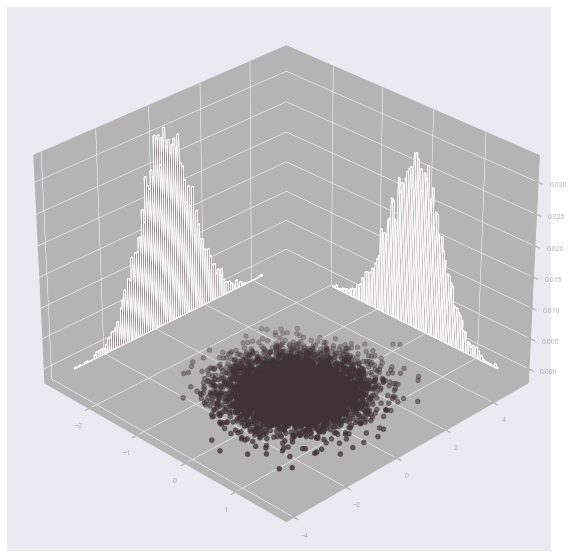

In [3]:
width = 10
height = 10

bg_color = (180/255, 180/255, 180/255, 1.0)
grid_color = (1, 1, 1, 1)
grid_line_width = 0.5
grid_line_style = "-"

scatter_color = (64/255, 50/255, 55/255, .8)
bar_color = (64/255, 50/255, 55/255, .8)

bar_count = 100

from pylab import rcParams
rcParams['axes.edgecolor'] = (0, 0, 0, 0)

fig = plt.figure(figsize=(width, height))
ax = plt.axes(projection='3d')

ax.tick_params(axis='x', colors=bg_color, labelsize=7)
ax.tick_params(axis='y', colors=bg_color, labelsize=7)
ax.tick_params(axis='z', colors=bg_color, labelsize=7)

ax.yaxis._axinfo['grid']['color'] = grid_color
ax.yaxis._axinfo["grid"]['linestyle'] = grid_line_style
ax.yaxis._axinfo["grid"]['linewidth'] = grid_line_width
ax.w_yaxis.set_pane_color(bg_color)

ax.xaxis._axinfo['grid']['color'] = grid_color
ax.xaxis._axinfo["grid"]['linestyle'] = grid_line_style
ax.xaxis._axinfo["grid"]['linewidth'] = grid_line_width
ax.w_xaxis.set_pane_color(bg_color)

ax.zaxis._axinfo['grid']['color'] = grid_color
ax.zaxis._axinfo["grid"]['linestyle'] = grid_line_style
ax.zaxis._axinfo["grid"]['linewidth'] = grid_line_width
ax.w_zaxis.set_pane_color(bg_color)

ax.view_init(elev=30, azim=-45)

# Data for three-dimensional scattered points
zdata = [0] * num_samples
xdata = signal01
ydata = signal02
ax.scatter3D(xdata, ydata, zdata, color=scatter_color)

h01 = np.histogram(signal01, bins=bar_count)
pz = [0] * bar_count
dz = list(h01[0] / np.sum(h01[0]))
px = list(h01[1][:-1])
py = [np.max(ydata) + 1] * bar_count
dx = [(h01[1][-1] - h01[1][0])/(bar_count * 1.2)] * bar_count
dy = [0] * bar_count
ax.bar3d(px, py, pz, dx, dy, dz, shade=False, color=bar_color)

h01 = np.histogram(signal02, bins=bar_count)
pz = [0] * bar_count
dz = list(h01[0] / np.sum(h01[0]))
py = list(h01[1][:-1])
px = [np.min(xdata) - 1] * bar_count
dx = [0] * bar_count
dy = [(h01[1][-1] - h01[1][0])/(bar_count* 1.2)] * bar_count
ax.bar3d(px, py, pz, dx, dy, dz, shade=False, color=bar_color)

In [4]:
num_samples = 5000

signal01 = norm.rvs(loc=0, scale=1, size=(1, num_samples))[0]
signal02 = norm.rvs(loc=0, scale=1, size=(1, num_samples))[0]

# ---

# specify desired std
raw_std = 11.2
fwd_std = 0.5

std_m = np.array([
    [raw_std, 0],
    [0, fwd_std]
])

# specify desired correlation
corr_m = np.array([
    [1, 0.5],
    [.5, 1]
])

# calc desired covariance
cov_m = np.dot(std_m, np.dot(corr_m, std_m))

# calculate correlated signal

from scipy.linalg import cholesky
cky = cholesky(cov_m, lower=True)

corr_data = np.dot(cky, [signal01, signal02])

signal01 = corr_data[0]
signal02 = corr_data[1]

print(np.corrcoef(signal01, signal02))

[[1.         0.50115866]
 [0.50115866 1.        ]]
